In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = 'mode_full.csv'
df = pd.read_csv(csv_file_path)
df = df.iloc[3:]
# Initialize an empty list to store selected rows
selected_rows = []

# Loop through the rows and select rows with 'roi' in 'stimuli type'
for index, row in df.iterrows():
    stimuli_type = row['stimuli type']
    if 'roi' in stimuli_type:
        selected_rows.append(row)

# Create a new DataFrame with the selected rows
roi_df = pd.DataFrame(selected_rows)



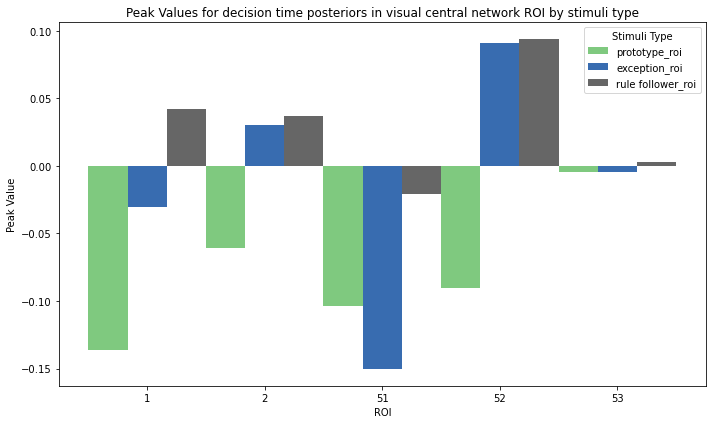

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DMN_df = t_df[t_df['network'] == 'DMN']
DA_df = t_df[t_df['network'] == 'DorsalAttention']
salience= t_df[t_df['network'] == 'salience']
control= t_df[t_df['network'] == 'control']
viscent= t_df[t_df['network'] == 'VisualCentral']
target_df =viscent
# Get unique ROIs
rois = target_df['roi'].unique()

# Get unique stimuli types for coloring
stimuli_types = target_df['stimuli type'].unique()

# Calculate the number of distinct stimuli types
num_stimuli_types = len(stimuli_types)

# Create a color map for the unique stimuli types
color_map = plt.cm.get_cmap('Accent', num_stimuli_types)
# Set up the plot
plt.figure(figsize=(10, 6))

# Loop through each ROI and create histograms for different stimuli types
for idx, roi in enumerate(rois):
    roi_df = target_df[target_df['roi'] == roi]
    width = 0.2  # Width of each bar

    for i, stimuli in enumerate(stimuli_types):
        sub_df = roi_df[roi_df['stimuli type'] == stimuli]
        x_values = np.arange(len(sub_df)) + idx * num_stimuli_types * width + i * width
        color = color_map(i)
        
        plt.bar(x_values, sub_df['peak_value'], width=width, color=color, label=stimuli)

# Set the x ticks and labels
x_ticks = np.arange(len(rois)) * num_stimuli_types * width + (num_stimuli_types - 1) * width / 2
x_labels = rois
plt.xticks(x_ticks, x_labels)

plt.xlabel('ROI')
plt.ylabel('Peak Value')
plt.title('Peak Values for decision time posteriors in visual central network ROI by stimuli type')
plt.legend(title='Stimuli Type', labels=stimuli_types)

# Show the plot
plt.tight_layout()
plt.show()

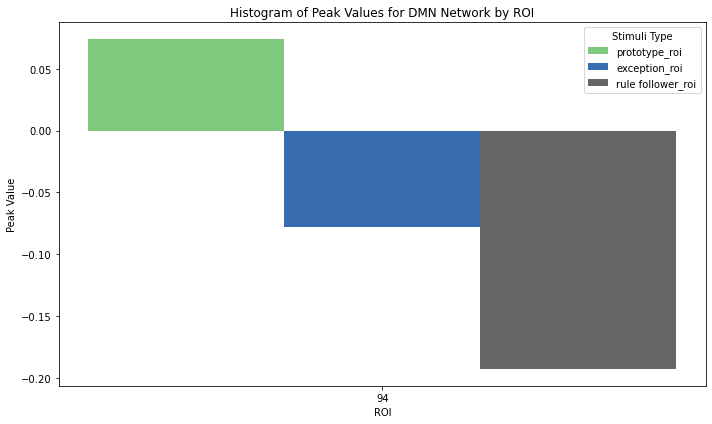

In [42]:
t_df = roi_df[roi_df['parameter'] == 't']
dmn_df = t_df[t_df['network'] == 'DMN']

# Get unique ROIs
rois = dmn_df['roi'].unique()

# Get unique stimuli types for coloring
stimuli_types = dmn_df['stimuli type'].unique()

# Calculate the number of distinct stimuli types
num_stimuli_types = len(stimuli_types)

# Create a color map with higher contrast (Accent color map)
color_map = plt.cm.get_cmap('Accent', num_stimuli_types)

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop through each ROI and create histograms for different stimuli types
for idx, roi in enumerate(rois):
    roi_df = dmn_df[dmn_df['roi'] == roi]
    width = 0.2  # Width of each bar

    for i, stimuli in enumerate(stimuli_types):
        sub_df = roi_df[roi_df['stimuli type'] == stimuli]
        x_values = np.arange(len(sub_df)) + idx * num_stimuli_types * width + i * width
        color = color_map(i)
        
        plt.bar(x_values, sub_df['peak_value'], width=width, color=color, label=stimuli)

# Set the x ticks and labels
x_ticks = np.arange(len(rois)) * num_stimuli_types * width + (num_stimuli_types - 1) * width / 2
x_labels = rois
plt.xticks(x_ticks, x_labels)

plt.xlabel('ROI')
plt.ylabel('Peak Value')
plt.title('Histogram of Peak Values for DMN Network by ROI')
plt.legend(title='Stimuli Type', labels=stimuli_types)

# Show the plot
plt.tight_layout()
plt.show()